# SDSS DR14 Data Classification with Neural Networks

## **Introduction:**
This notebook demonstrates how to build a neural network model to classify astronomical objects from sample data from the SDSS DR14.
The goal is to predict the 'class' of an object, as ethier a `STAR`, `GALAXY` or `QSO`, based on its features like `ra`, `dec`, `u`, `g`, `r`, `i` and `z`.

## **Data Loading and Exploration:**

Load the dataset using the `pandas` libary

In [49]:
import pandas as pd
#data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

#Google Drive link
url = "https://drive.google.com/uc?id=1Pfii448H__H0qa644YhTKUG68Z8VmxLv"

# Load the CSV file
data = pd.read_csv(url)

The first few rows of the dataset can be displayed using `.head`

In [50]:
display(data.head())

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


The data's structure and summary statistics can be explored using `.info` and `.describe`

In [51]:
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


## **Feature Selection and Target Variable:**
We will only use the following features for classification:
- `ra`: Right ascension
- `dec`: Declination
- `u`, `g`, `r`, `i`, `z`: Magnitudes in different photometric bands

We define a new varible `X` which is the dataset cut to only include these features

The target column, `class`, that represents the type of astronomical object is set to a new varible `Y`.


In [52]:
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']
target = 'class'

X = data[features]
Y = data[target]

## **Encoding the Target Variable:**
The target variable 'class' is categorical. We need to encode it into numerical values using LabelEncoder.

In [53]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

## **Normalising features:**

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Data Splitting:**

We split the data into training and testing sets so that the decison tree model performance is evaluated on unseen data.
- 80% of the data is used for model training.
- 20% of the data is used for model testing.
- `random_state` ensures reproducibility.

We use the `sklearn.model_selection` module to slit the data set into training and testing subsets. Where `test_size=0.2` specifies the proportion of the dataset to include in the test split and `random_state=42` sets an arbitrary seed value used to initialize the random number generator used to slipt the dataset in a reproducible way.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Convert the datasets into tensors so pytorch can use them

In [56]:
import torch

# Convert features to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convert labels to PyTorch tensors
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

## **Dataset Class and DataLoader:**

In [57]:
from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


## **Building the Neural Network Model:**

In [58]:
import torch.nn as nn

# Define Neural Network Model
class SDSSClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SDSSClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Define model parameters
input_dim = X_train.shape[1]  # Number of features
hidden_dim = 64               # Number of neurons in the hidden layer
output_dim = len(label_encoder.classes_)  # Number of output classes

# Instantiate the model
model = SDSSClassifier(input_dim, hidden_dim, output_dim)

## **Loss and Optimizer:**
Defining the Loss Function and Optimizer

In [59]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

## **Train the Model:**

In [60]:
# Train the Model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        total_loss += loss.item()  # Accumulate loss

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")
print("Model training completed.")


Epoch 1/10, Loss: 0.8329
Epoch 2/10, Loss: 0.6234
Epoch 3/10, Loss: 0.5628
Epoch 4/10, Loss: 0.5212
Epoch 5/10, Loss: 0.4803
Epoch 6/10, Loss: 0.4373
Epoch 7/10, Loss: 0.3966
Epoch 8/10, Loss: 0.3644
Epoch 9/10, Loss: 0.3401
Epoch 10/10, Loss: 0.3209
Model training completed.


## **Saving the Model:**

In [61]:
# Save the Model
torch.save(model.state_dict(), 'sdss_classifier.pth')
print("Model saved as 'sdss_classifier.pth'")

Model saved as 'sdss_classifier.pth'


## **Model Evaluation:**
We will evaluate the model using the following metrics:
- **Accuracy:** Percentage of correctly classified instances.
- **Classification Report:** Provides precision, recall, F1-score, and support for each class.
- **Confusion Matrix:** Visualizes the distribution of correct and incorrect predictions.

In [62]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Evaluate the Model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():  # No need to calculate gradients during evaluation
    for inputs, labels in test_loader:
        outputs = model(inputs)  # Forward pass
        _, preds = torch.max(outputs, 1)  # Get class predictions
        all_preds.extend(preds.numpy())  # Store predictions
        all_labels.extend(labels.numpy())  # Store true labels


Accuracy

In [63]:
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


Classification Report

In [64]:
# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.94      0.90      0.92       996
         QSO       0.92      0.86      0.89       190
        STAR       0.88      0.95      0.91       814

    accuracy                           0.91      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.91      0.91      2000



Confusion Matrix

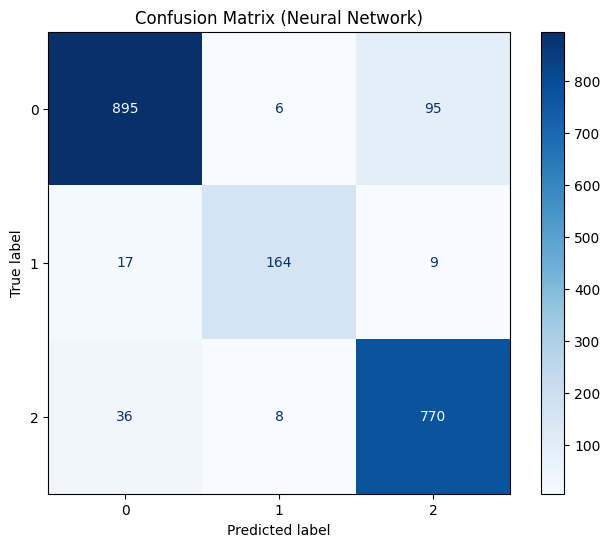

In [65]:
import matplotlib.pyplot as plt

# Confusion matrix visualization using from_predictions
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(all_labels, all_preds, cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix (Neural Network)")
plt.show()


## **Comparative Histograms:**

We can compare the distribution of predicted classes with the true class distribution using histograms.
This helps visualize how well the model captures the underlying patterns in the data. 

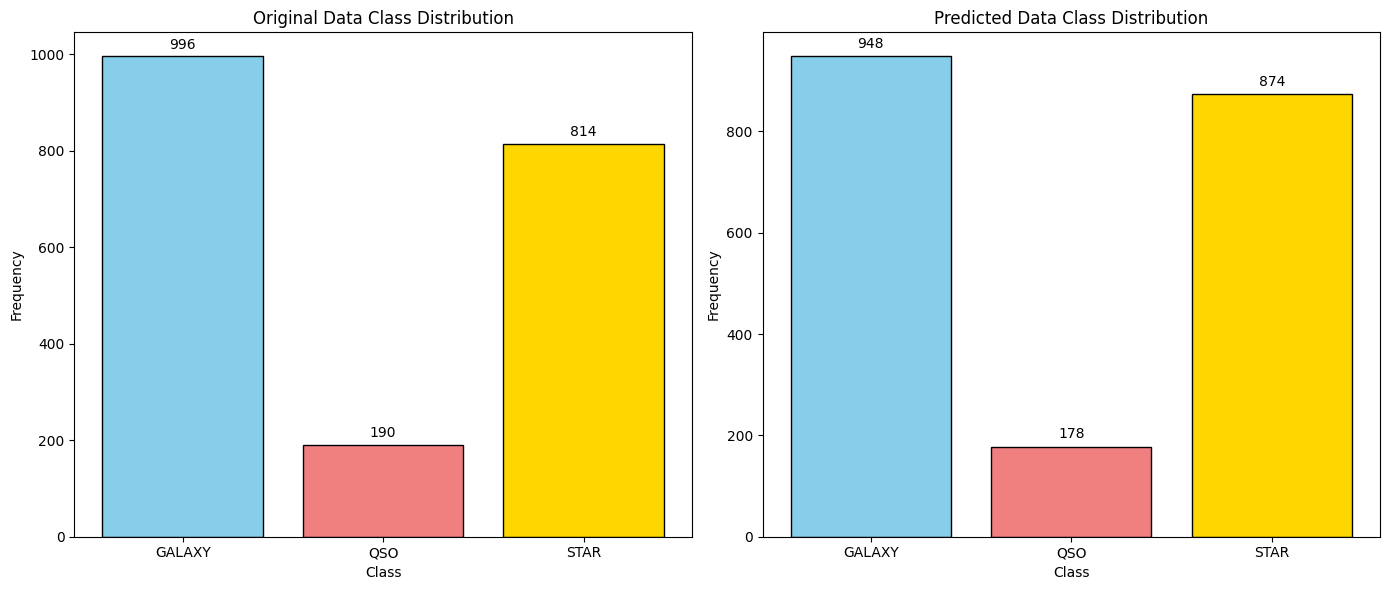

In [66]:
import numpy as np

# Decode numeric class labels back to original class names
decoded_labels = label_encoder.inverse_transform(all_labels)
decoded_preds = label_encoder.inverse_transform(all_preds)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define class order and colors
class_order = label_encoder.classes_  # ['GALAXY', 'QSO', 'STAR'] as determined by LabelEncoder
colors = ['skyblue', 'lightcoral', 'gold']

# Original Data Distribution
unique_classes, counts = np.unique(decoded_labels, return_counts=True)
class_counts = dict(zip(unique_classes, counts))  # Create a dictionary mapping classes to counts
ordered_counts = [class_counts.get(cls, 0) for cls in class_order]  # Get counts in the desired order
axes[0].bar(class_order, ordered_counts, color=colors, width=0.8, edgecolor='black')
axes[0].set_title("Original Data Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")

# Predicted Data Distribution
unique_classes, counts = np.unique(decoded_preds, return_counts=True)
class_counts = dict(zip(unique_classes, counts))  # Create a dictionary mapping classes to counts
ordered_counts = [class_counts.get(cls, 0) for cls in class_order]  # Get counts in the desired order
axes[1].bar(class_order, ordered_counts, color=colors, width=0.8, edgecolor='black')
axes[1].set_title("Predicted Data Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")

# Add labels to bars
for ax in axes:
    for i, rect in enumerate(ax.patches):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 10, f"{height:.0f}",
                ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


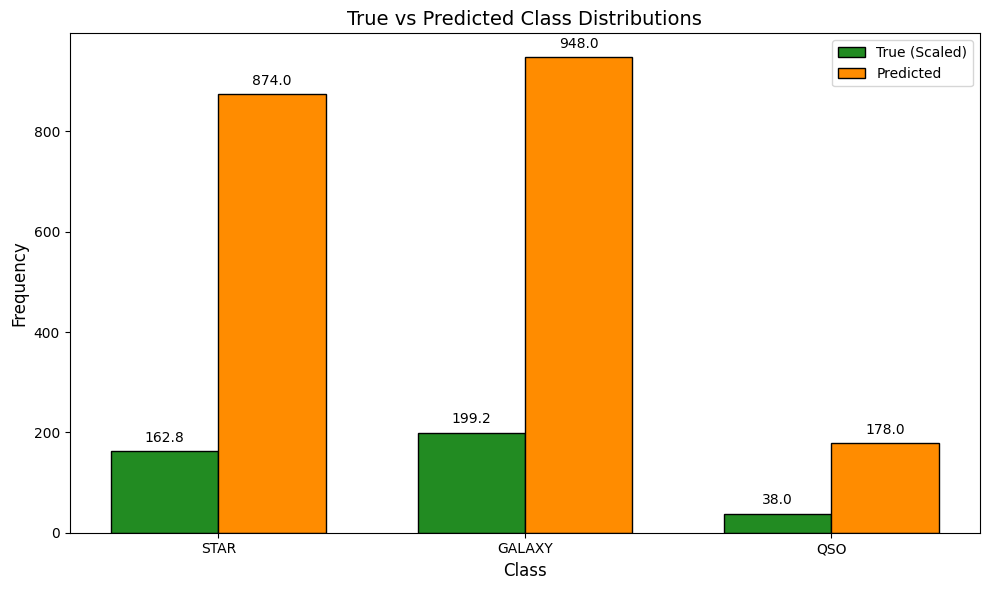

In [67]:
# Set scaling factor based on 80-20 split
scaling_factor = 0.2

# Compute true and predicted counts
true_counts_scaled = dict(zip(*np.unique(decoded_labels, return_counts=True)))
pred_counts = dict(zip(*np.unique(decoded_preds, return_counts=True)))

# Define class order and colors
class_order = ['STAR', 'GALAXY', 'QSO']
colors = ['forestgreen', 'darkorange']

# Prepare data
true_ordered_scaled = [true_counts_scaled.get(cls, 0) * scaling_factor for cls in class_order]
pred_ordered = [pred_counts.get(cls, 0) for cls in class_order]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(class_order))

# Plot histograms for scaled true values and predicted values
ax.bar(x - bar_width / 2, true_ordered_scaled, bar_width, label='True (Scaled)', color=colors[0], edgecolor='black')
ax.bar(x + bar_width / 2, pred_ordered, bar_width, label='Predicted', color=colors[1], edgecolor='black')

# Add labels, title, and legend
ax.set_title('True vs Predicted Class Distributions', fontsize=14)
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(class_order)
ax.legend()

# Add values on bars
for i, value in enumerate(true_ordered_scaled):
    ax.text(i - bar_width / 2, value + max(pred_ordered) * 0.02, f"{value:.1f}", ha='center', fontsize=10)
for i, value in enumerate(pred_ordered):
    ax.text(i + bar_width / 2, value + max(pred_ordered) * 0.02, f"{value:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()



## **Class Counts:**

In [68]:
# True class counts
#print("True Class Counts:")
#for class_name in ['STAR', 'GALAXY', 'QSO']:
#        count = decoded_labels[decoded_labels['class'] == class_name].shape[0]
#        print(f"{class_name}: {count}")

# Predicted class counts
#print("\nPredicted Class Counts:")
#Y_pred_series = pd.Series(Y_pred)  # Convert Y_pred to a pandas Series if not already
#for class_name in ['STAR', 'GALAXY', 'QSO']:
#    count = Y_pred_series.value_counts().get(class_name, 0)  # Use `.get()` to avoid KeyErrors
#    print(f"{class_name}: {count}")


## **Feature Importance:**

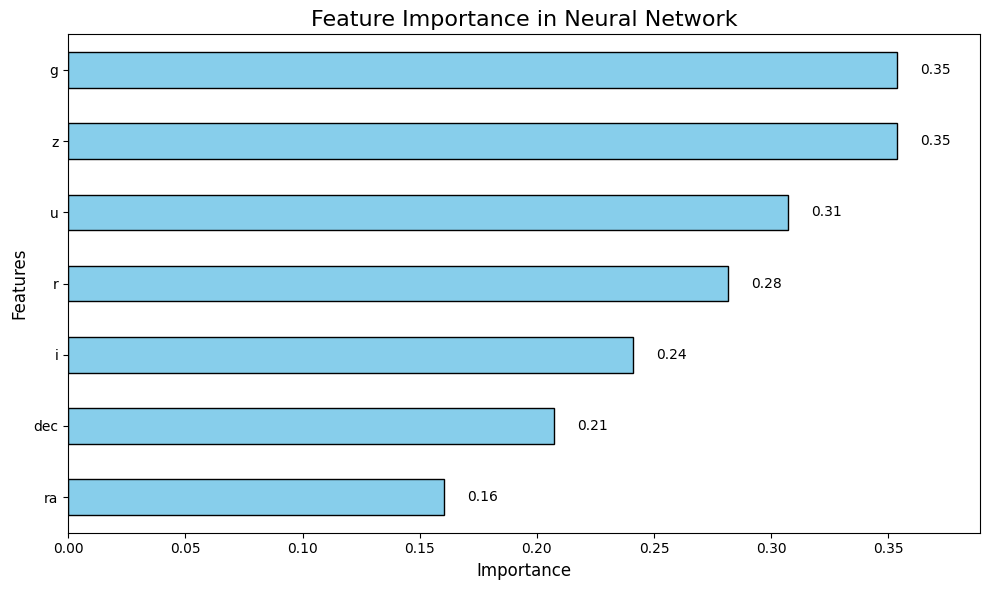

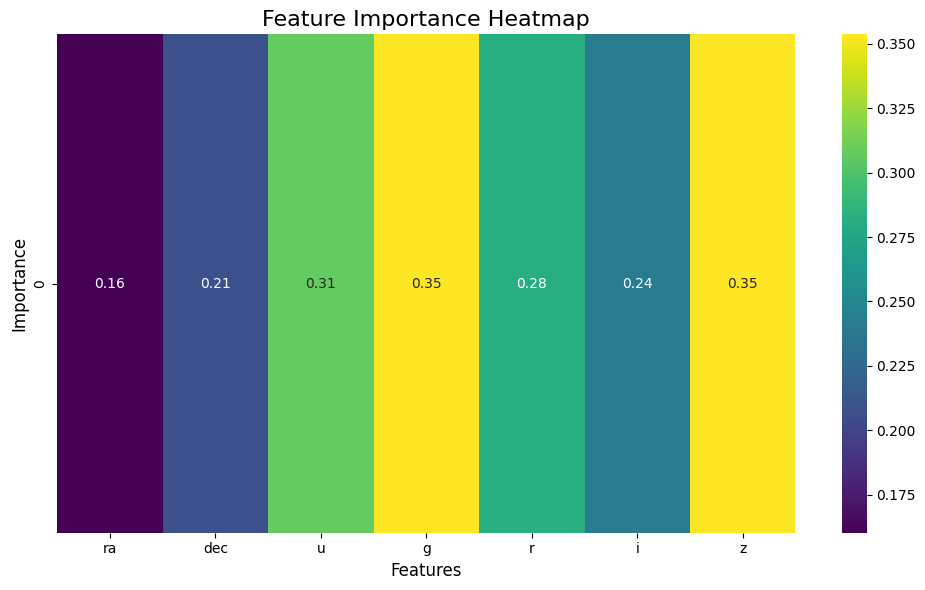

In [69]:
# Extract the weights of the first layer of the neural network
input_weights = model.fc[0].weight.detach().numpy()

# Calculate the mean absolute weight for each feature
feature_importances = np.mean(np.abs(input_weights), axis=0)

# Create a pandas Series for feature importances
feature_importances = pd.Series(feature_importances, index=features)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Importance in Neural Network', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()  # Show most important features at the top

# Adjust x-axis limits to ensure all text fits within the plot
plt.xlim(0, feature_importances.max() * 1.1)  # Add 10% padding to the maximum value

# Annotate bars with importance values
for index, value in enumerate(feature_importances):
    annotation_position = min(value + 0.01, feature_importances.max() * 1.05)
    plt.text(annotation_position, index, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

#Heatmap of features
import seaborn as sns

# Match weights to original feature order
original_feature_order = features  # The original feature order
original_order_weights = pd.Series([feature_importances[feature] for feature in original_feature_order], 
                                    index=original_feature_order)

# Convert to DataFrame for the heatmap
importance_df_original_order = original_order_weights.to_frame().T

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df_original_order, annot=True, cmap='viridis', cbar=True, fmt='.2f')
plt.title('Feature Importance Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()





## **Comparison to Desicsion Tree:**

- **Accuracy:** The Neural Network approach achieved an accuracy of 92%, while the basic Decision Tree approach (without any optimisations) achieved 77%.

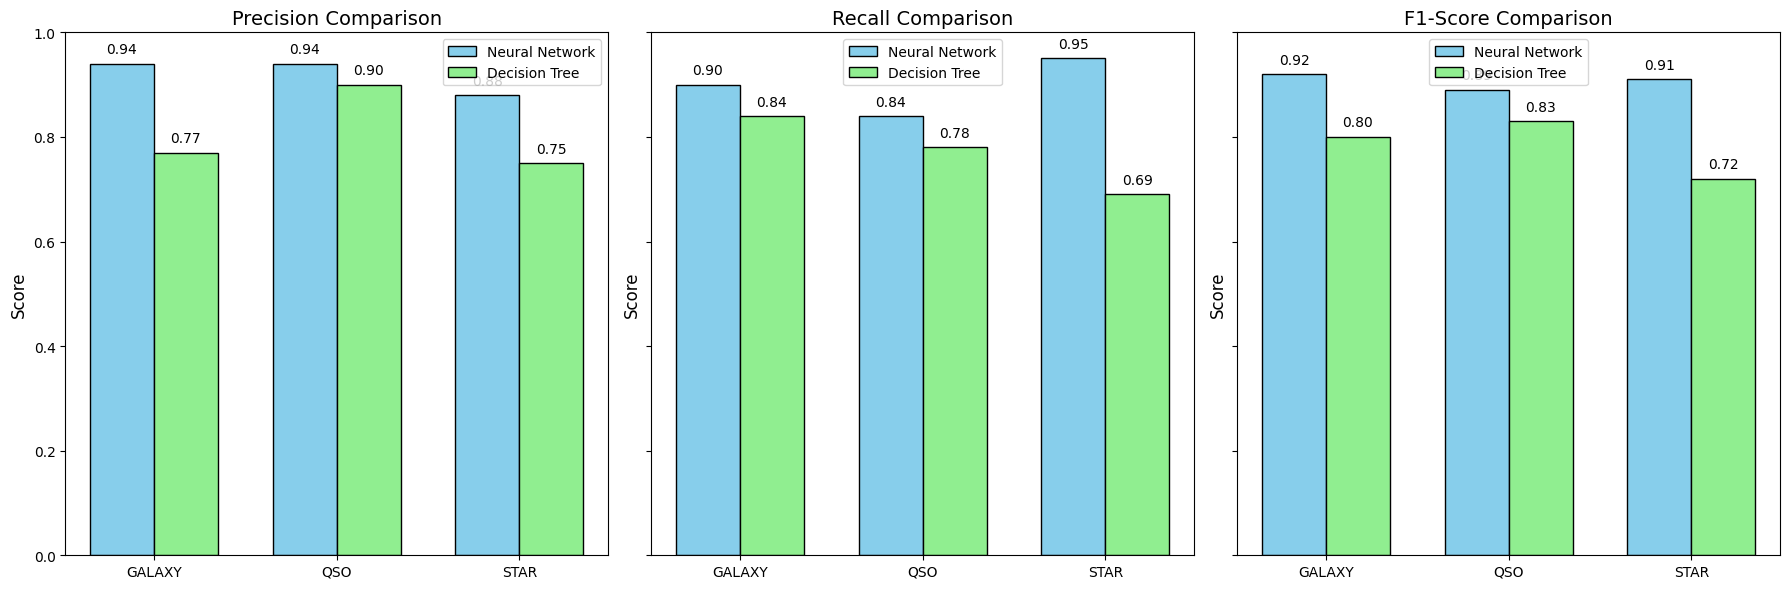

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for Neural Network and Decision Tree
classes = ['GALAXY', 'QSO', 'STAR']
nn_metrics = {
    'Precision': [0.94, 0.94, 0.88],
    'Recall': [0.90, 0.84, 0.95],
    'F1-Score': [0.92, 0.89, 0.91]
}
dt_metrics = {
    'Precision': [0.77, 0.90, 0.75],
    'Recall': [0.84, 0.78, 0.69],
    'F1-Score': [0.80, 0.83, 0.72]
}

# Create the plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
bar_width = 0.35
x = np.arange(len(classes))

for i, metric in enumerate(nn_metrics.keys()):
    ax = axes[i]
    ax.bar(x - bar_width/2, nn_metrics[metric], bar_width, label='Neural Network', color='skyblue', edgecolor='black')
    ax.bar(x + bar_width/2, dt_metrics[metric], bar_width, label='Decision Tree', color='lightgreen', edgecolor='black')
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_ylim(0, 1.0)
    ax.legend()
    
    # Add values on top of bars
    for j, v in enumerate(nn_metrics[metric]):
        ax.text(j - bar_width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for j, v in enumerate(dt_metrics[metric]):
        ax.text(j + bar_width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


- **Overall Performance**:
  - The **Neural Network (NN)** outperforms the **Decision Tree (DT)** in all metrics, achieving higher accuracy, precision, recall, and F1-scores across all classes.

- **Class-Level Metrics**:
  - For the **GALAXY** class:
    - NN achieves **higher precision (0.94)** compared to DT's **0.77**, meaning NN produces fewer false positives.
    - NN has a slightly lower recall (**0.90**) than DT's **0.84**, indicating it identifies more true positives.
  - For the **QSO** class:
    - NN has **higher recall (0.84)** compared to DT's **0.78**, meaning NN captures more true positives for this class.
    - Precision is slightly higher for NN (**0.94**) compared to DT (**0.90**).
  - For the **STAR** class:
    - NN excels with **precision (0.88)** and **recall (0.95)**, both significantly higher than DT's **0.75 (precision)** and **0.69 (recall)**.

- **Weighted and Macro Averages**:
  - The **NN's weighted averages** for precision, recall, and F1-scores are consistently around **0.91**, indicating a balanced performance across all classes.
  - The DT's weighted averages are significantly lower at **0.77**, reflecting reduced performance consistency.

- **Model Selection Insights**:
  - The NN demonstrates superior capability in handling imbalanced data and complex patterns, making it a better choice for this classification task.
  - The DT may be more interpretable, but its reduced performance highlights its limitations in capturing intricate relationships in the data.

- **Practical Implications**:
  - For scenarios requiring high precision (e.g., reducing false positives in classification), the NN is clearly more suitable.
  - If computational simplicity or interpretability is more critical, the DT may still be considered, but at the cost of performance.


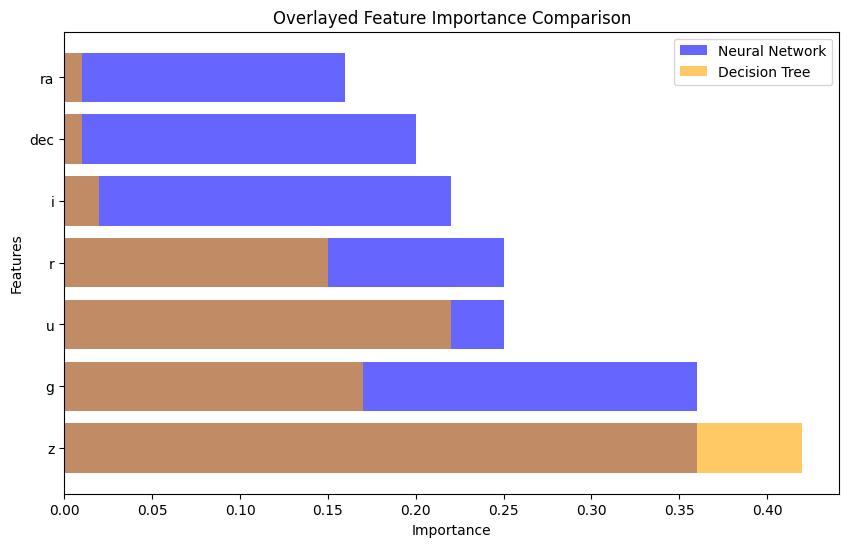

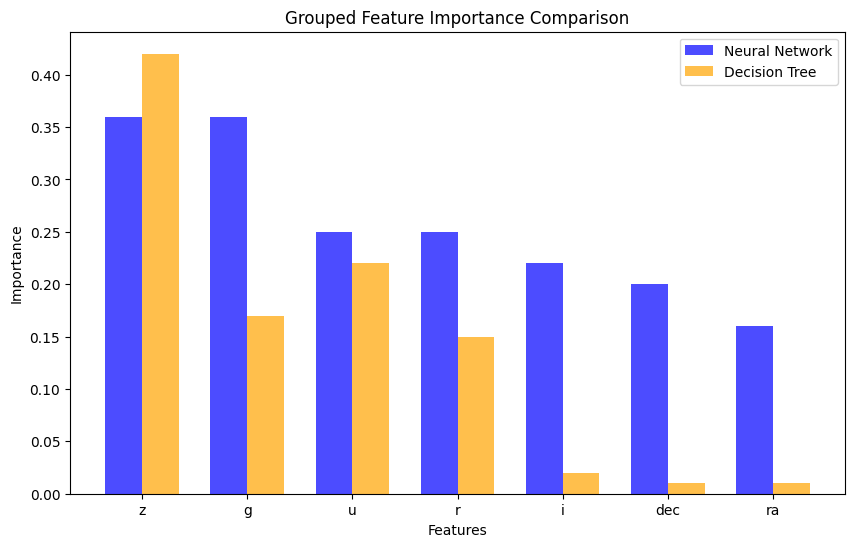

In [71]:
# Feature names and their importance values for both models
features = ['z', 'g', 'u', 'r', 'i', 'dec', 'ra']
importance_nn = [0.36, 0.36, 0.25, 0.25, 0.22, 0.20, 0.16]
importance_dt = [0.42, 0.17, 0.22, 0.15, 0.02, 0.01, 0.01]

# Overlayed Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance_nn, color='blue', alpha=0.6, label='Neural Network')
plt.barh(features, importance_dt, color='orange', alpha=0.6, label='Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Overlayed Feature Importance Comparison')
plt.legend()
plt.show()

# Grouped Bar Plot
x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, importance_nn, width, label='Neural Network', color='blue', alpha=0.7)
plt.bar(x + width/2, importance_dt, width, label='Decision Tree', color='orange', alpha=0.7)
plt.xticks(ticks=x, labels=features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Grouped Feature Importance Comparison')
plt.legend()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Example confusion matrices
cm_dt = np.array([[835, 7, 154],  # Decision Tree
                  [9, 148, 33],
                  [239, 10, 565]])

cm_nn = np.array([[850, 5, 141],  # Neural Network (example values)
                  [8, 160, 22],
                  [230, 15, 569]])

labels = ['GALAXY', 'QSO', 'STAR']

# Side-by-Side Heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

# Difference Heatmap
cm_diff = cm_nn - cm_dt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_diff, annot=True, fmt='+d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Difference in Confusion Matrices (NN - DT)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## **10. Conclusion:**
This notebook demonstrates the process of building, training, and evaluating a neural network model for classifying astronomical objects. We explored data preprocessing, model building, training, evaluation, visualization, and potential optimization techniques.

Further exploration can involve experimenting with different model architectures, hyperparameters, and optimization techniques to achieve better performance.